In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
inputX = pd.read_csv('q4x.dat',sep="  ",header=None, engine = 'python')
X = inputX.as_matrix()
X = np.insert(X,0,1,axis=1)
X = np.asmatrix(X)
inputY = pd.read_csv('q4y.dat',sep="  ",header=None, engine = 'python')
Y = inputY.as_matrix()
Y = np.asmatrix(Y)

In [3]:
count0 = 0
count1 = 0
for i in range(0, len(Y)-1):
    if(Y[i,0]=='Alaska'):
        count1+=1
count0 = len(Y)-count1

In [4]:
phi = count1/len(Y)

In [5]:
Mean0 = np.matrix([[0],[0],[0]])
Mean1 = np.matrix([[0],[0],[0]])
for i in range(0,len(Y)-1):
    if(Y[i,0]=='Canada'):
        Mean0 = Mean0 + np.transpose(X[i])
    else:
        Mean1 = Mean1 + np.transpose(X[i])
Mean0 = Mean0/count0
Mean1 = Mean1/count1

In [6]:
Mean0

matrix([[   0.98],
        [ 135.3 ],
        [ 359.84]])

In [7]:
COV = np.matrix([[0,0,0],[0,0,0],[0,0,0]])


In [8]:
for i in range(0,len(Y)):
    if(Y[i,0]=='Canada'):
        COV = COV+(X[i]-Mean0)*np.linalg.inv(X[i]-Mean0)
    else:
        COV = COV+(X[i]-Mean1)*np.linalg.inv(X[i]-Mean1)
COV = COV/len(Y)

In [9]:
COV

matrix([[-0.56654451, -0.73251209, -0.15608315],
        [ 0.31614622, -0.257586  ,  0.39371712],
        [-4.29697022,  1.88995428,  2.43134084]])

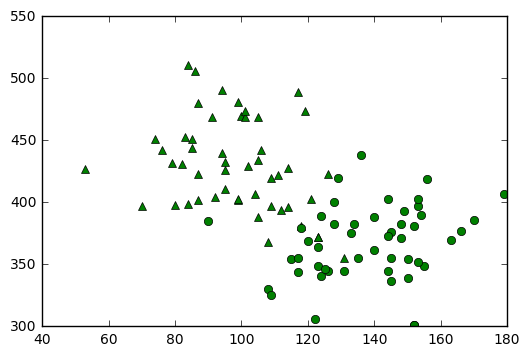

In [10]:
for i in range(0,len(X)-1):
    if(Y[i]=='Alaska'):
        plt.plot(X[i,1],X[i,2],'g^')
    else:
        plt.plot(X[i,1],X[i,2],'go')
plt.show()

In [11]:
phi

0.5

In [12]:
COV_inv = np.linalg.inv(COV)
COV_inv

matrix([[-0.51553311,  0.55902499, -0.12362057],
        [-0.92560984, -0.77050355,  0.06535009],
        [-0.19161038,  1.58691457,  0.14201933]])

In [21]:
COV

matrix([[-0.56654451, -0.73251209, -0.15608315],
        [ 0.31614622, -0.257586  ,  0.39371712],
        [-4.29697022,  1.88995428,  2.43134084]])

In [14]:
Mean1

matrix([[   1.  ],
        [  98.38],
        [ 429.66]])

In [15]:
a1 = 0.98
b1 = 135.3
c1 = 359.84
a2 = 1.00
b2=98.38
c2 = 429.66
t11 = COV_inv[0,0]
t12 = COV_inv[0,1]
t13 = COV_inv[0,2]
t21 = COV_inv[1,0]
t22 =  COV_inv[1,1]
t23 =  COV_inv[1,2]
t31 =  COV_inv[2,0]
t32 = COV_inv[2,1]
t33 = COV_inv[2,2]

In [16]:
d = t32*b1-t32*b2+t23*b1 - t23*b2+2*t33*c1 - 2*t33*c2 + t31*a1 - t31*a2 + t13*a1 - t13*a2
d

41.176336052583068

In [17]:
x1c = t21*a2 - t21*a1 + t12*a2 - t12*a1 + 2*t22*b2-2*t22*b1 + t32*c2 - t32*c1+t23*c2 - t23*c1
x1c

172.24776924170442

In [18]:
c = (1-a1)*(1-a1)*t11-(1-a2)*(1-a2)*t11+t21*a1*b1 - t21*a2*b2 - t12*b1+t12*b2+t12*b1*a1-t12*b2*a2 + t22*b1*b1-t22*b2*b2+t32*c1*b1-t32*c2*b2+t23*b1*c1-t23*b2*c2+t33*c1*c1-t33*c2*c2+t13*a1*c1-t13*a2*c2-t31*c1+t31*c2+t31*a1*c1-t31*a2*c2-t13*c1+t13*c2
c

-3905.3291740155996

In [19]:
x2 = lambda x1: (c/d)+(x1c/d)*x1

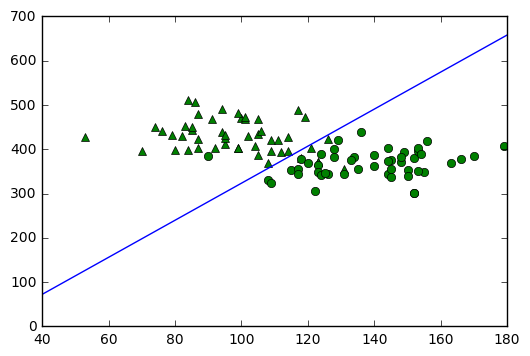

In [20]:
for i in range(0,len(X)-1):
    if(Y[i]=='Alaska'):
        plt.plot(X[i,1],X[i,2],'g^')
    else:
        plt.plot(X[i,1],X[i,2],'go')
X1D = np.matrix([[40],[180]])
X2D = np.matrix([[x2(40)],[x2(180)]])
plt.plot(X1D,X2D,r'')
plt.show()